## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則化來觀察訓練情形。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dataset = datasets.load_boston()
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=4)

In [3]:
x_train.shape[1]

13

In [4]:
alphas = (0.1, 0.5, 1, 2, 10)
a_num = len(alphas)
pred_num = x_train.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((a_num, pred_num))
train_r_squared = np.zeros(a_num)
test_r_squared = np.zeros(a_num)

for ind, i in enumerate(alphas):
    # 建立一個線性回歸模型
    lasso = linear_model.Lasso(alpha=i)

    # 將訓練資料丟進去模型訓練
    lasso.fit(x_train, y_train)
    
    coeff_a[ind,:] = lasso.coef_
    train_r_squared[ind] = lasso.score(x_train, y_train)
    test_r_squared[ind] = lasso.score(x_test, y_test)

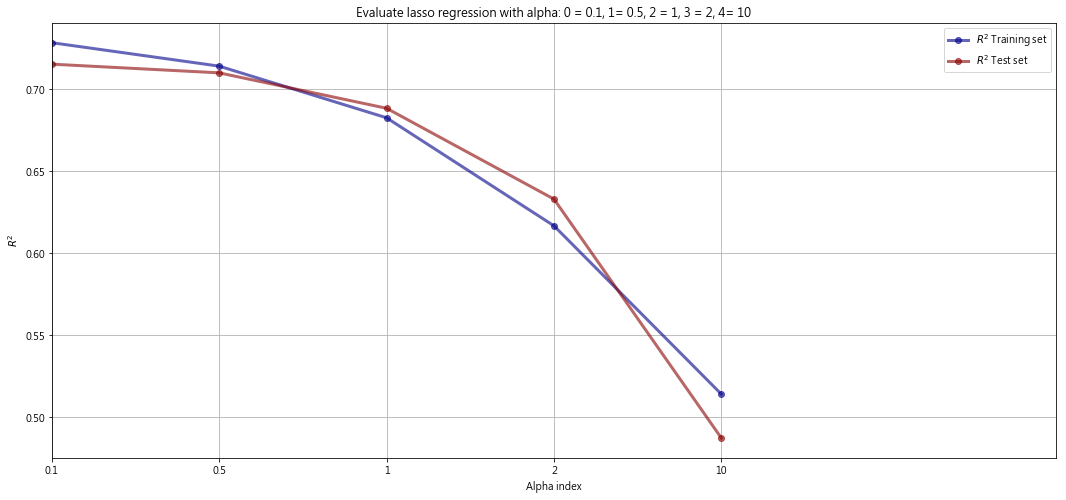

In [5]:
# Plotting
position = [0,1,2,3,4]
values = [0.1, 0.5, 1, 2, 10]
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Alpha index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with alpha: 0 = 0.1, 1= 0.5, 2 = 1, 3 = 2, 4= 10')
plt.legend(loc='best')
plt.xticks(position, values)
plt.grid()

本案例中，alpha值越大，lasso fit 的越差